In [26]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_moons
from sklearn.metrics.cluster import adjusted_rand_score
import matplotlib.font_manager as fm
from sklearn.preprocessing import StandardScaler
font_path = "C:/Program Files (x86)/Naver/NanumFont/NanumBarunGothic.ttf"
fontprop = fm.FontProperties(fname = font_path, size = 15, style='normal', weight='bold')
fontprop_1 = fm.FontProperties(fname = font_path, size = 11)

In [5]:
X, y = make_blobs(random_state = 0, n_samples = 12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("클러스터 레이블: \n", clusters)

클러스터 레이블: 
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


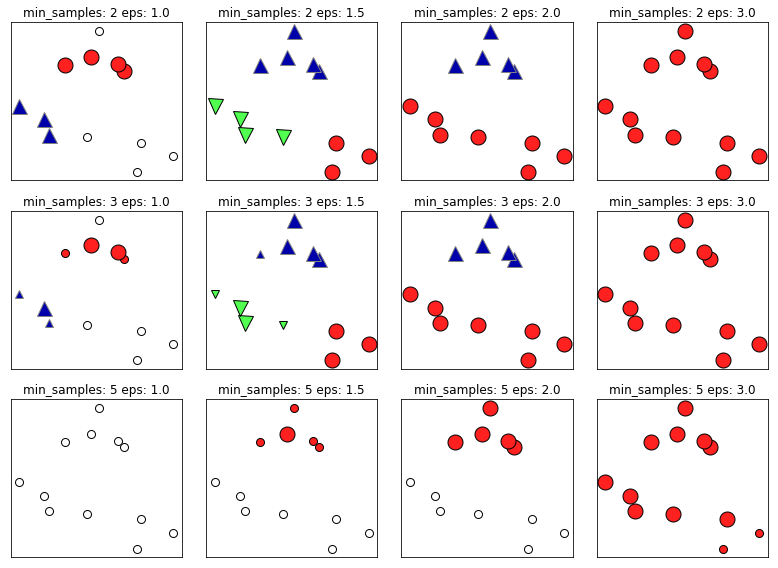

In [8]:
mglearn.plots.plot_dbscan()

Text(0, 0.5, '특성 1')

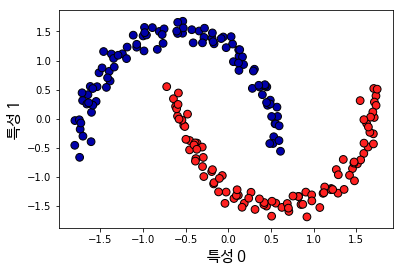

In [16]:
X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbsscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c= clusters, cmap = mglearn.cm2, s = 60, edgecolors = "black")
plt.xlabel("특성 0", fontproperties = fontprop)
plt.ylabel("특성 1", fontproperties = fontprop)

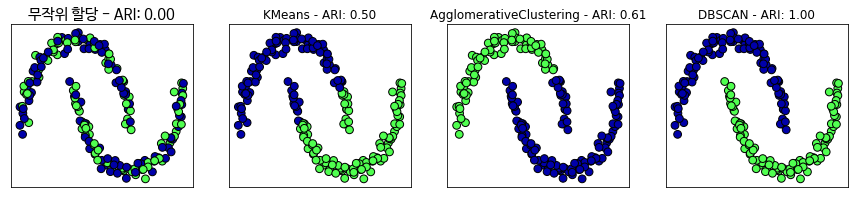

In [24]:
X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={"xticks": (), "yticks": ()})

algorithms = [KMeans(n_clusters = 2), AgglomerativeClustering(n_clusters = 2), DBSCAN()]

random_state = np.random.RandomState(seed = 0)
random_clusters = random_state.randint(low = 0, high = 2, size = len(X))
axes[0].scatter(X_scaled[:,0], X_scaled[:,1], c = random_clusters, cmap = mglearn.cm3, s = 60, edgecolors = "black")
axes[0].set_title("무작위 할당 - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)), fontproperties = fontprop)

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c = clusters, cmap = mglearn.cm3, s = 60, edgecolors = "black")
    ax.set_title("{} - ARI: {:.2f}".format(type(algorithm).__name__, adjusted_rand_score(y, clusters)))

In [31]:
# difference accuracy_score and adjusted-rand_score

cluster_1 = [0, 0, 1, 1, 0]
cluster_2 = [1, 1, 0, 0, 1]

print("정확도: {:.2f}".format(accuracy_score(cluster_1, cluster_2)))
print("정확도: {:.2f}".format(adjusted_rand_score(cluster_1, cluster_2)))

정확도: 0.00
정확도: 1.00
